In [17]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [18]:
np.random.seed(0)

In [19]:
n_pts = 500
X, y = datasets.make_circles(n_samples = n_pts, random_state =123, noise = 0.1, factor = 0.2)


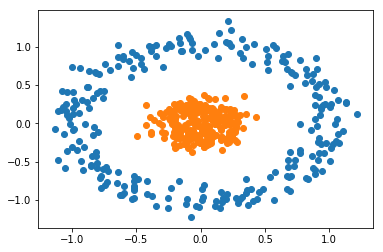

In [20]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [21]:
model = Sequential()
model.add(Dense(4, input_shape =(2,), activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics = ['accuracy'])


In [22]:
h = model.fit(x=X, y=y, verbose = 1, batch_size = 20, epochs = 100, shuffle = 'true')

Epoch 1/100
500/500 [==============================] - 0s 638us/step - loss: 0.6959 - acc: 0.5100
Epoch 2/100
500/500 [==============================] - 0s 71us/step - loss: 0.6937 - acc: 0.6200
Epoch 3/100
500/500 [==============================] - 0s 70us/step - loss: 0.6925 - acc: 0.5140
Epoch 4/100
500/500 [==============================] - 0s 71us/step - loss: 0.6916 - acc: 0.6780
Epoch 5/100
500/500 [==============================] - 0s 72us/step - loss: 0.6905 - acc: 0.6300
Epoch 6/100
500/500 [==============================] - 0s 72us/step - loss: 0.6890 - acc: 0.3640
Epoch 7/100
500/500 [==============================] - 0s 72us/step - loss: 0.6865 - acc: 0.6460
Epoch 8/100
500/500 [==============================] - 0s 72us/step - loss: 0.6838 - acc: 0.6740
Epoch 9/100
500/500 [==============================] - 0s 72us/step - loss: 0.6796 - acc: 0.7580
Epoch 10/100
500/500 [==============================] - 0s 71us/step - loss: 0.6733 - acc: 0.7980
Epoch 11/100
500/500 [======

Text(0.5,1,"['accuracy']")

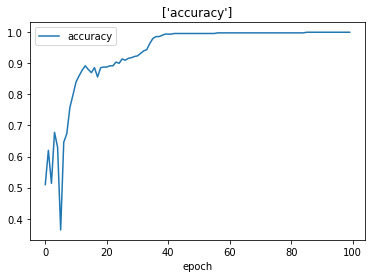

In [23]:
plt.plot(h.history['acc'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title(['accuracy'])

Text(0.5,1,"['loss']")

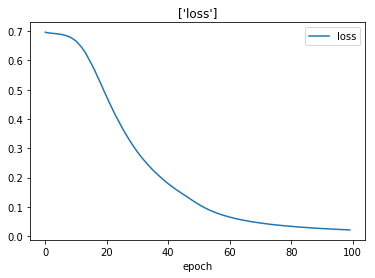

In [24]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title(['loss'])

In [26]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) -1, max(X[:, 0]) + 0.25, 50)
    y_span = np.linspace(min(X[:, 1]) -1, max(X[:, 1]) + 0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

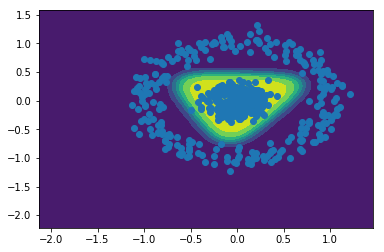

In [27]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

('Prediction is:', array([[0.99030954]], dtype=float32))


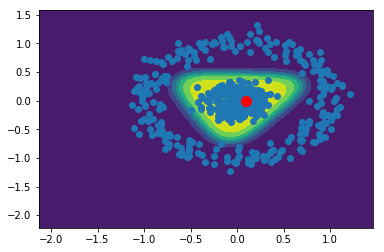

In [29]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0.1
y = 0
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x] , [y], marker = 'o', markersize = 10, color = "red")
print("Prediction is:", prediction)